yaş gruplarının kayıt zamanlarına göre verimli kampanyaları çıkarmak 
sadık müşteri profili çıkarıldı 
sadık müşteri alışveriş alışkanlığı çıkarıldı 


In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv(r"C:\Users\simge\Downloads\marketing_campaign.csv", sep="\t")

data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Processing the INCOME Column


In [4]:

data["Income"].fillna(data["Income"].mean(), inplace=True)

data["Income"] = data["Income"].astype(int)


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\3955644289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Income"].fillna(data["Income"].mean(), inplace=True)


In [5]:

data['income_group'] = pd.qcut(data['Income'], q=4, labels=['Low', 'Medium', 'High', 'High-plus'])

data['income_group_num'] = data['income_group'].cat.codes + 1


print(data[['Income', 'income_group', 'income_group_num']].head(10))


   Income income_group  income_group_num
0   58138         High                 3
1   46344       Medium                 2
2   71613    High-plus                 4
3   26646          Low                 1
4   58293         High                 3
5   62513         High                 3
6   55635         High                 3
7   33454          Low                 1
8   30351          Low                 1
9    5648          Low                 1


Education level mostly affects income and also influences consumption habits, which is why we give it significant weight.

In [6]:

education_map = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

data['EducationLevel'] = data['Education'].map(education_map)


Married or Not Variable

In [7]:
data = data[~data['Marital_Status'].isin(['Absurd', 'YOLO'])]
data['Marital_Status'] = data['Marital_Status'].replace({'Alone': 'Single'})


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\2332984804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status'] = data['Marital_Status'].replace({'Alone': 'Single'})


Marital status naturally affects shopping behavior, so we assign it some weight to ensure its impact is accurately reflected in our models.

In [8]:
print(data['Marital_Status'].value_counts())

marital_mapping = {
    'Single': 1,
    'Divorced': 1,
    'Widow': 1,
    'Married': 2,
    'Together': 2,
}

data['Marital_Status_Encoded'] = data['Marital_Status'].map(marital_mapping)


Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: count, dtype: int64


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\3747134295.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status_Encoded'] = data['Marital_Status'].map(marital_mapping)


Inference About the Presence of Children


In [9]:
data['has_kids'] = ((data['Kidhome'] > 0) | (data['Teenhome'] > 0)).astype(int)


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\2089435506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_kids'] = ((data['Kidhome'] > 0) | (data['Teenhome'] > 0)).astype(int)


In [10]:
import pandas as pd


data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce').dt.normalize()


data['month_year'] = data['Dt_Customer'].dt.to_period('M').astype(str)
data['year']       = data['Dt_Customer'].dt.year
data['month']      = data['Dt_Customer'].dt.month

data['half_year']  = data['month'].apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

data['year_half']  = data['year'].astype(str) + ' - ' + data['half_year']

data = data.drop(columns=['year', 'month', 'half_year'])
  
print(data[['Dt_Customer', 'month_year', 'year_half']].head())



  Dt_Customer month_year             year_half
0  2012-04-09    2012-04   2012.0 - First Half
1  2014-08-03    2014-08  2014.0 - Second Half
2         NaT        NaT     nan - Second Half
3  2014-10-02    2014-10  2014.0 - Second Half
4         NaT        NaT     nan - Second Half


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\1484247454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce').dt.normalize()
C:\Users\simge\AppData\Local\Temp\ipykernel_8968\1484247454.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_year'] = data['Dt_Customer'].dt.to_period('M').astype(str)
C:\Users\simge\AppData\Local\Temp\ipykernel_8968\1484247454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [11]:

data['Age'] = data['Dt_Customer'].dt.year - data['Year_Birth']

data = data[(data['Age'] >= 18) & (data['Age'] <= 90)]

In [12]:
data.drop(columns=['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue','income_group'], inplace=True)


In [13]:
data

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,income_group_num,EducationLevel,Marital_Status_Encoded,has_kids,month_year,year_half,Age
0,5524,58138,58,635,88,546,172,88,88,3,...,0,0,1,3,3,1,0,2012-04,2012.0 - First Half,55.0
1,2174,46344,38,11,1,6,2,1,6,2,...,0,0,0,2,3,1,1,2014-08,2014.0 - Second Half,60.0
3,6182,26646,26,11,4,20,10,3,5,2,...,0,0,0,1,3,2,1,2014-10,2014.0 - Second Half,30.0
5,7446,62513,16,520,42,98,0,42,14,2,...,0,0,0,3,4,2,1,2013-09,2013.0 - Second Half,46.0
7,6177,33454,32,76,10,56,3,1,23,2,...,0,0,0,1,5,2,1,2013-08,2013.0 - Second Half,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,4201,57967,39,229,7,137,4,0,91,5,...,0,0,0,3,3,1,1,2013-03,2013.0 - First Half,51.0
2228,8720,52247,53,32,2,1607,12,4,22,0,...,0,0,0,3,2,2,0,2012-12,2012.0 - Second Half,34.0
2233,9432,666666,23,9,14,18,8,1,12,4,...,0,0,0,4,3,2,1,2013-02,2013.0 - First Half,36.0
2234,8372,34421,81,3,3,7,6,2,9,1,...,0,0,0,1,3,2,1,2013-01,2013.0 - First Half,39.0


                      Young  Old
year_half                       
2012.0 - First Half      42   52
2012.0 - Second Half     53   62
2013.0 - First Half      98  147
2013.0 - Second Half     94  146
2014.0 - First Half      39   60
2014.0 - Second Half     43   77


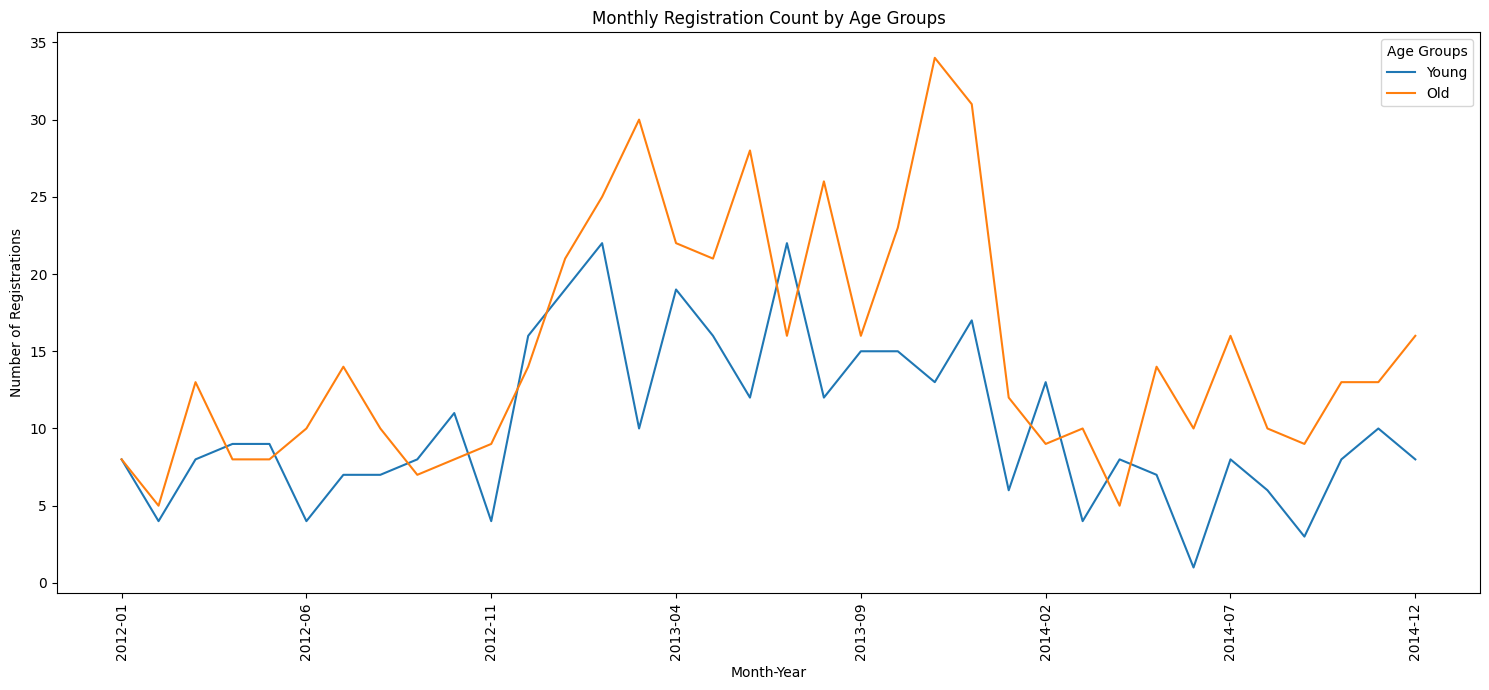

In [14]:

data.loc[data['Age'] < 18, 'Age'] = np.nan

data = data.dropna(subset=['Age'])


data['Age'] = data['Age'].astype(int)

data['Age_Group_Num'] = pd.cut(data['Age'], bins=[18, 40, 90], labels=[0, 1], right=False).astype('Int64')

age_yearhalf_counts = data.groupby(['year_half', 'Age_Group_Num']).size().unstack(fill_value=0)
age_yearhalf_counts.columns = ['Young', 'Old']
print(age_yearhalf_counts)

age_monthyear_counts = data.groupby(['month_year', 'Age_Group_Num']).size().unstack(fill_value=0)
age_monthyear_counts.columns = ['Young', 'Old']

age_monthyear_counts.plot(kind='line', figsize=(15,7))
plt.title('Monthly Registration Count by Age Groups')
plt.xlabel('Month-Year')
plt.ylabel('Number of Registrations')
plt.legend(title='Age Groups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                 'NumStorePurchases', 'NumWebVisitsMonth']
data['Total_Purchases'] = data[purchase_cols].sum(axis=1)

data['Avg_Spend_Per_Purchase'] = data['Total_Spending'] / data['Total_Purchases'].replace(0, np.nan)
data['Basket_Diversity'] = data[spending_cols].gt(0).sum(axis=1)

Since the Income values were right-skewed and the IQR method did not yield accurate results, we applied a logarithmic transformation.


In [16]:
import numpy as np

data['Log_Income'] = np.log1p(data['Income'])

Outlier Handling Using IQR Clipping

In [17]:
def iqr_clip(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower, upper=upper).round().astype(int)
    return data



spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending']

data = iqr_clip(data, spending_cols)


In [18]:

data3 = pd.DataFrame(({
   'Total_Spending': data['Total_Spending'],
    'Total_Purchases': data['Total_Purchases'],
    'Basket_Diversity': data['Basket_Diversity'],
    'total_campaign_accepted': data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
}))
correlation_matrix = data3.corr()
correlation_matrix

,Total_Spending,Total_Purchases,Basket_Diversity,total_campaign_accepted
Total_Spending,1.000000,0.617270,0.295113,0.493065
Total_Purchases,0.617270,1.000000,0.225305,0.224934
Basket_Diversity,0.295113,0.225305,1.000000,0.046831
total_campaign_accepted,0.493065,0.224934,0.046831,1.000000


In [19]:

w_spending = 0.4
w_purchases = 0.3
w_campaign = 0.3  


data['norm_spending'] = (data['Total_Spending'] - data['Total_Spending'].min()) / (data['Total_Spending'].max() - data['Total_Spending'].min())
data['norm_purchases'] = (data['Total_Purchases'] - data['Total_Purchases'].min()) / (data['Total_Purchases'].max() - data['Total_Purchases'].min())

data['total_campaign_accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
data['norm_campaign'] = data['total_campaign_accepted'] / 5  # normalize


data['Loyalty_Score'] = (
    w_spending * data['norm_spending'] +
    w_purchases * data['norm_purchases'] +
    w_campaign * data['norm_campaign']
)

threshold = data['Loyalty_Score'].quantile(0.90)  
data['Is_Loyal'] = (data['Loyalty_Score'] >= threshold).astype(int)

loyal_customers = data[data['Is_Loyal'] == 1]



In [20]:
def iqr_clip(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower, upper=upper).round().astype(int)
    return data



spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending']




loyal_customers = data[data['Is_Loyal'] == 1]

profile_summary = {
    'Average_Age': loyal_customers['Age'].mean(),
    'Average_Income': loyal_customers['Log_Income'].mean(),
    'Married_Rate': (loyal_customers['Marital_Status_Encoded'] == 2).mean(),
    'Has_Child_Rate': (loyal_customers['has_kids'] == 1).mean(),
    'Average_Education_Level': loyal_customers['EducationLevel'].mean(),
}

profile_df = pd.DataFrame(profile_summary, index=['Value']).T

for col in ['Married_Rate', 'Has_Child_Rate']:
    profile_df.loc[col, 'Value'] = f"{profile_df.loc[col, 'Value'] * 100:.2f}%"

print(profile_df)



                             Value
Average_Age              42.293478
Average_Income           11.235881
Married_Rate                61.96%
Has_Child_Rate              26.09%
Average_Education_Level   3.652174


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\2181595407.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '61.96%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  profile_df.loc[col, 'Value'] = f"{profile_df.loc[col, 'Value'] * 100:.2f}%"


In [21]:
cmp_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
cmp_summary = data[cmp_cols].mean().reset_index()
cmp_summary.columns = ['Campaign','Acceptance_Rate']
print(cmp_summary)


       Campaign  Acceptance_Rate
0  AcceptedCmp1         0.066813
1  AcceptedCmp2         0.007667
2  AcceptedCmp3         0.069003
3  AcceptedCmp4         0.077766
4  AcceptedCmp5         0.082147
5      Response         0.145674


In [22]:

data = data.dropna(subset=['Avg_Spend_Per_Purchase'])

data['Avg_Spend_Per_Purchase'] = data['Avg_Spend_Per_Purchase'].astype(int)

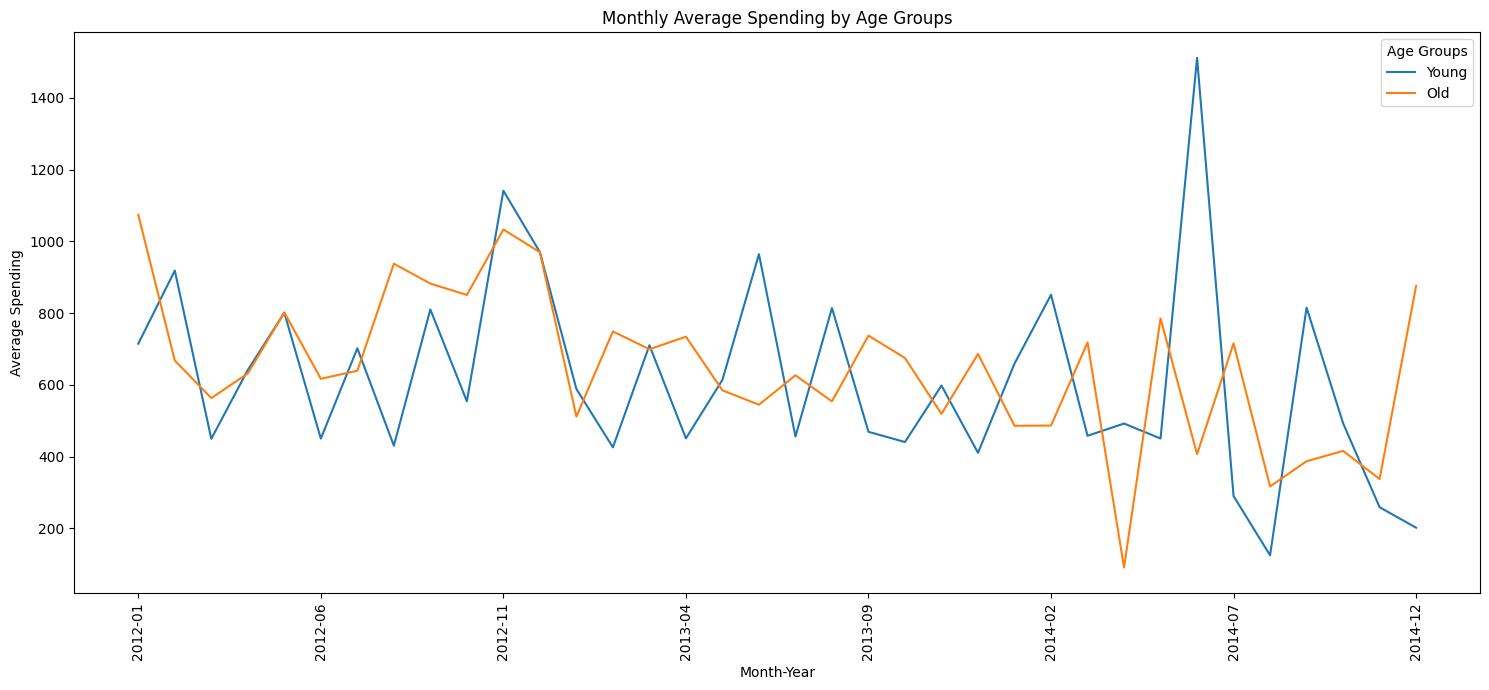

In [23]:

avg_spending = data.groupby(['month_year', 'Age_Group_Num'])['Total_Spending'].mean().unstack()
avg_spending.columns = ['Young', 'Old']

avg_spending.plot(kind='line', figsize=(15,7))
plt.title('Monthly Average Spending by Age Groups')
plt.xlabel('Month-Year')
plt.ylabel('Average Spending')
plt.legend(title='Age Groups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


 Average Acceptance Rate by Campaigns

This bar plot visualizes the average acceptance rates for different marketing campaigns and response.


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\3428025190.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cmp_summary, x='Campaign', y='Acceptance_Rate', palette='viridis')


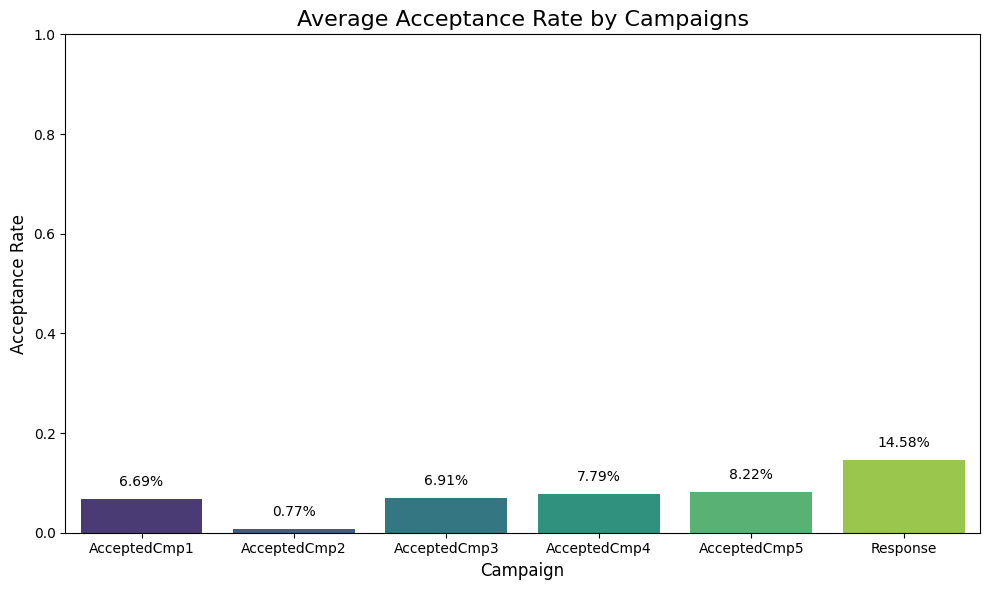

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
cmp_summary = data[cmp_cols].mean().reset_index()
cmp_summary.columns = ['Campaign', 'Acceptance_Rate']

plt.figure(figsize=(10, 6))
sns.barplot(data=cmp_summary, x='Campaign', y='Acceptance_Rate', palette='viridis')

plt.title('Average Acceptance Rate by Campaigns', fontsize=16)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('Campaign', fontsize=12)
plt.ylim(0, 1)

for i, row in cmp_summary.iterrows():
    plt.text(i, row['Acceptance_Rate'] + 0.02, f"{row['Acceptance_Rate']:.2%}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics of the Age variable
age_mean = data['Age'].mean()
age_std = data['Age'].std()
age_min = data['Age'].min()
age_max = data['Age'].max()

print(f"Age Mean: {age_mean:.2f}")
print(f"Age Standard Deviation: {age_std:.2f}")
print(f"Age Minimum: {age_min}")
print(f"Age Maximum: {age_max}")



Age Mean: 44.08
Age Standard Deviation: 11.78
Age Minimum: 18
Age Maximum: 73


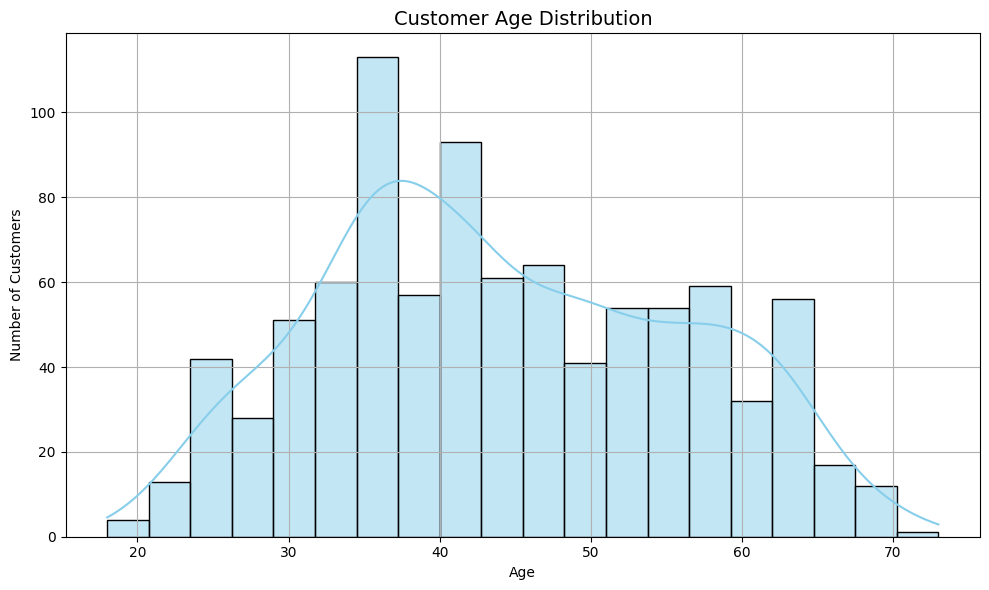

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title("Customer Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()



Monthly Loyal Customer Count by Age Groups - Moving Average

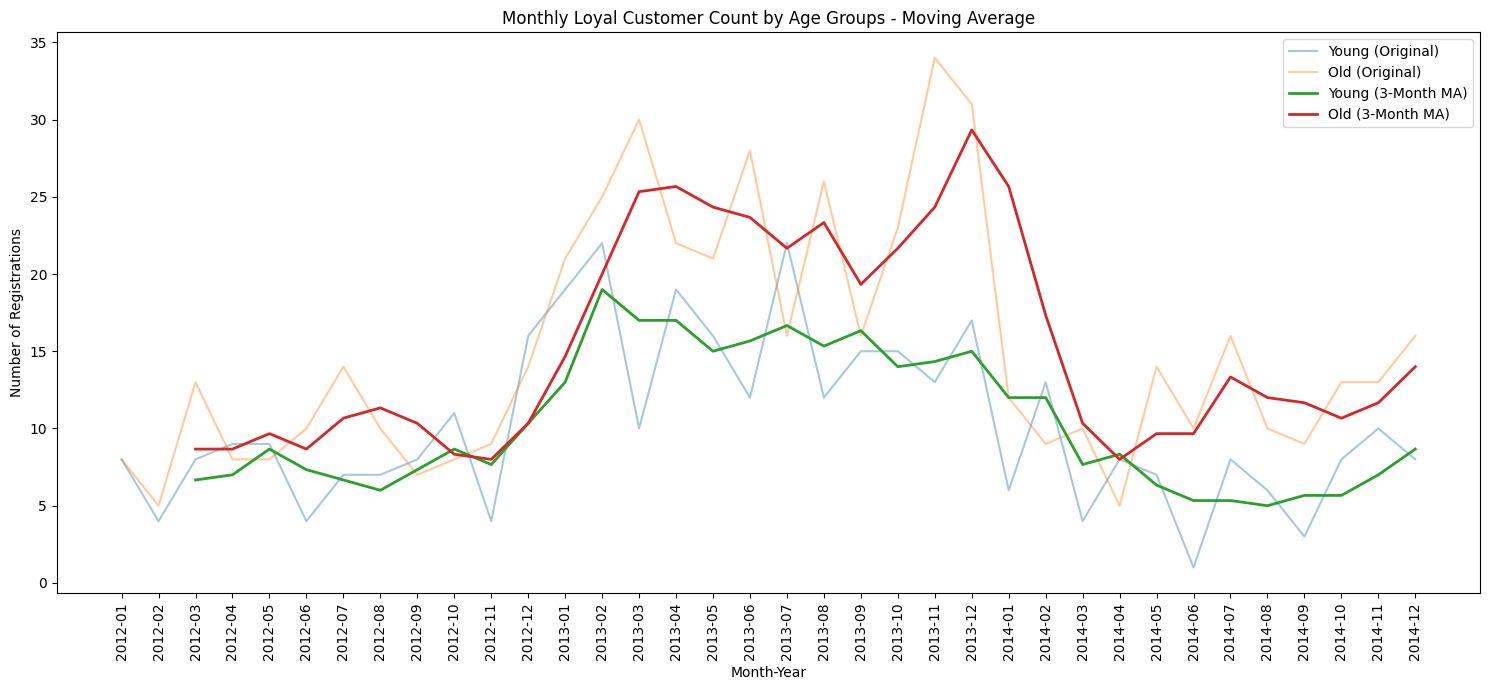

In [27]:

ma_counts = age_monthyear_counts.rolling(window=3).mean()


import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(age_monthyear_counts.index, age_monthyear_counts['Young'], label='Young (Original)', alpha=0.4)
plt.plot(age_monthyear_counts.index, age_monthyear_counts['Old'], label='Old (Original)', alpha=0.4)
plt.plot(ma_counts.index, ma_counts['Young'], label='Young (3-Month MA)', linewidth=2)
plt.plot(ma_counts.index, ma_counts['Old'], label='Old (3-Month MA)', linewidth=2)
plt.title('Monthly Loyal Customer Count by Age Groups - Moving Average')
plt.xlabel('Month-Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:


profile_summary_clean = pd.DataFrame([{
    'Average_Age': round(loyal_customers['Age'].mean(), 2),
    'Average_Income': round(loyal_customers['Log_Income'].mean(), 2),
    'Married_Rate': round((loyal_customers['Marital_Status_Encoded'] == 2).mean(), 2),
    'Has_Child_Rate': round((loyal_customers['has_kids'] == 1).mean(), 2),
    'Average_Education_Level': round(loyal_customers['EducationLevel'].mean(), 2),
}])


profile_summary_clean = profile_summary_clean.astype(float)


profile_summary_clean.to_csv("loyal_customer_profile_summary.csv", index=False)


In [29]:

bins = [18, 30, 45, 60, 75]
labels = ['1-18-30', '2-31-45', '3-46-60', '4-61-75']
loyal_customers['Age_Group'] = pd.cut(loyal_customers['Age'], bins=bins, labels=labels, right=False)


loyal_age_group_counts = loyal_customers['Age_Group'].value_counts().sort_index()

loyal_age_group_df = pd.DataFrame({
    'Age_Group': loyal_age_group_counts.index,
    'Loyal_Customer_Count': loyal_age_group_counts.values
})

loyal_age_group_df.to_csv("loyal_age_group_distribution_clean.csv", index=False)



            Product  Total_Spent
0          MntWines        82231
1   MntMeatProducts        39915
2   MntFishProducts         6715
3      MntGoldProds         6018
4  MntSweetProducts         4486
5         MntFruits         4384


C:\Users\simge\AppData\Local\Temp\ipykernel_8968\2507724622.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_summary, x='Total_Spent', y='Product', palette='viridis')


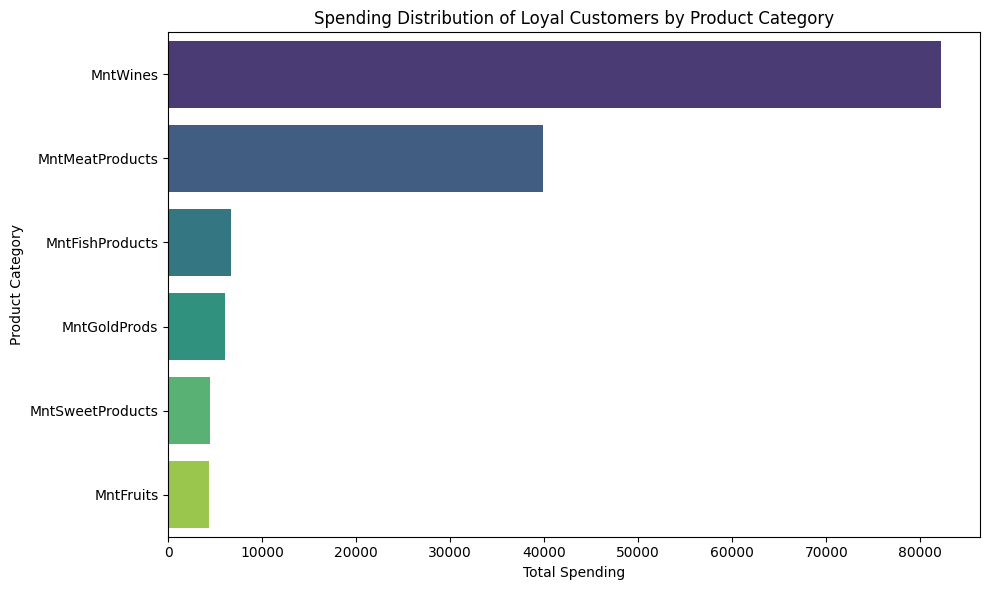

In [30]:
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

loyal_product_spending = loyal_customers[product_cols].sum().sort_values(ascending=False)

product_summary = pd.DataFrame({
    'Product': loyal_product_spending.index,
    'Total_Spent': loyal_product_spending.values
})

print(product_summary)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=product_summary, x='Total_Spent', y='Product', palette='viridis')
plt.title('Spending Distribution of Loyal Customers by Product Category')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()




In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features = [
    'EducationLevel', 'Marital_Status_Encoded', 'has_kids', 'income_group_num','Log_Income', 
    'Age', 'Age_Group_Num', 
    'Total_Spending', 'Avg_Spend_Per_Purchase', 
    'Total_Purchases', 'Basket_Diversity',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5'
]

X = data[features]
y = data['Is_Loyal']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
    
)


In [32]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# 1. Özellikler (X) ve hedef değişken (y)
features = [
  'EducationLevel', 
  'Marital_Status_Encoded', 
  'has_kids', 
  'income_group_num',
  'Log_Income', 
  'Age', 
  'Age_Group_Num', 
  'AcceptedCmp1', 
  'AcceptedCmp2', 
  'AcceptedCmp3', 
  'AcceptedCmp4', 
  'AcceptedCmp5'
]

X = data[features]
y = data['Is_Loyal']

# 2. Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. XGBoost modelini tanımla
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# 4. Modeli eğit
model.fit(X_train, y_train)

# 5. Tahmin yap
y_pred = model.predict(X_test)

# 6. Performans metrikleri
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[161   4]
 [  9   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       165
           1       0.69      0.50      0.58        18

    accuracy                           0.93       183
   macro avg       0.82      0.74      0.77       183
weighted avg       0.92      0.93      0.92       183


Accuracy: 0.9289617486338798


c:\Users\simge\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

features = [
  'EducationLevel', 
  'Marital_Status_Encoded', 
  'has_kids', 
  'income_group_num',
  'Log_Income', 
  'Age', 
  'Age_Group_Num', 
  'AcceptedCmp1', 
  'AcceptedCmp2', 
  'AcceptedCmp3', 
  'AcceptedCmp4', 
  'AcceptedCmp5'
]

X = data[features]
y = data['Is_Loyal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[163   2]
 [ 12   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       165
           1       0.75      0.33      0.46        18

    accuracy                           0.92       183
   macro avg       0.84      0.66      0.71       183
weighted avg       0.91      0.92      0.91       183


Accuracy: 0.9234972677595629


In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, classification_report, confusion_matrix


y_pred_cv = cross_val_predict(model, X, y, cv=5)

print("🧮 Confusion Matrix:\n", confusion_matrix(y, y_pred_cv))


print("\n📄 Classification Report:\n", classification_report(y, y_pred_cv))


print("\n📌 Hata Metrikleri:")
print(f"Accuracy     : {accuracy_score(y, y_pred_cv):.4f}")
print(f"Precision    : {precision_score(y, y_pred_cv):.4f}")
print(f"Recall       : {recall_score(y, y_pred_cv):.4f}")
print(f"F1-Score     : {f1_score(y, y_pred_cv):.4f}")
print(f"ROC AUC      : {roc_auc_score(y, y_pred_cv):.4f}")


🧮 Confusion Matrix:
 [[806  14]
 [ 48  44]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       820
           1       0.76      0.48      0.59        92

    accuracy                           0.93       912
   macro avg       0.85      0.73      0.77       912
weighted avg       0.93      0.93      0.93       912


📌 Hata Metrikleri:
Accuracy     : 0.9320
Precision    : 0.7586
Recall       : 0.4783
F1-Score     : 0.5867
ROC AUC      : 0.7306


In [35]:
exclude_cols = ['year_half', 'month_year', 'Loyalty_Score', 'Is_Loyal', 'Log_Income']

X = data.drop(columns=exclude_cols)

y = (data['Loyalty_Score'] * 100).astype(int)

model = RandomForestClassifier(random_state=42)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean accuracy: {np.mean(scores):.4f}')
print(f'Standard deviation: {np.std(scores):.4f}')


c:\Users\simge\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy scores: [0.4863388  0.52459016 0.56043956 0.48901099 0.37912088]
Mean accuracy: 0.4879
Standard deviation: 0.0607


In [36]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


features = [
    'EducationLevel', 'income_group_num',
    'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
   
]

X = data[features]
y = data['Is_Loyal']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[158   7]
 [ 11   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       165
           1       0.50      0.39      0.44        18

    accuracy                           0.90       183
   macro avg       0.72      0.67      0.69       183
weighted avg       0.89      0.90      0.90       183


Accuracy: 0.9016393442622951


In [37]:
data.to_csv("final_dataset.csv", index=False, float_format="%.5f")


In [38]:
product_summary.to_csv("product_spending_summary.csv", index=False)


In [39]:
data['Age_Group_Label'] = data['Age_Group_Num'].map({0: 'Young', 1: 'Old'})
cols_to_export = ['ID', 'Age', 'Age_Group_Label', 'month_year', 'year_half','Total_Spending']
data[cols_to_export].to_csv("age_time_grouped.csv", index=False)
